In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [4]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [5]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
X = df.drop('Survived', axis=1)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,NaN,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 30
        elif Pclass ==3:
            return 25
    
    else:
        return Age

In [9]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)
X = df.drop('Survived', axis=1)

In [10]:
X2D = pca.fit_transform(X)

In [11]:
X2D.shape

(891, 2)

In [12]:
pca.explained_variance_ratio_

array([0.93421226, 0.0648086 ])

In [13]:
import xgboost

xgb_clf = xgboost.XGBClassifier(n_estimators=200, learning_rate=0.04, max_depth=5)

y = df['Survived']

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(xgb_clf, X2D, y, cv=10, scoring='accuracy').mean()

0.6779775280898876

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


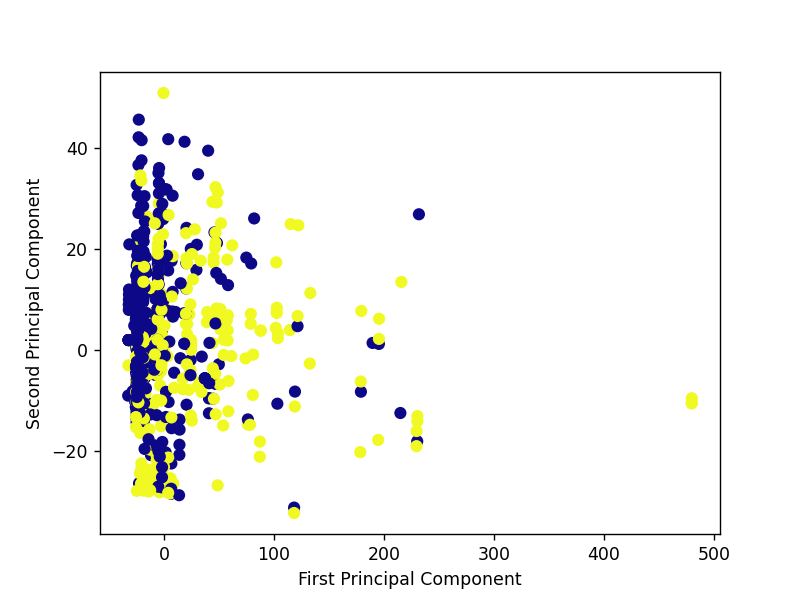

In [19]:
plt.scatter(X2D[:,0], X2D[:,1], c=df['Survived'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [20]:
from sklearn.decomposition import KernelPCA

k_pca = KernelPCA(n_components=2, kernel='cosine')

In [21]:
kpca_X = k_pca.fit_transform(X)

<IPython.core.display.Javascript object>


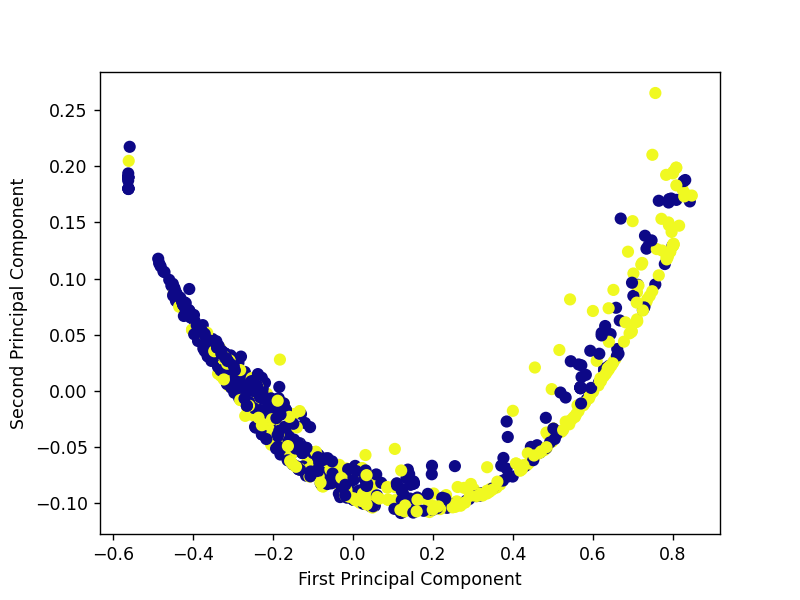

In [22]:
plt.scatter(kpca_X[:,0], kpca_X[:,1], c=df['Survived'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [23]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_neighbors=5)